# ARI scores for the precomputed datasets and clustering algorithms

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

In [2]:
import corc.our_datasets
import corc.our_algorithms
from tqdm import tqdm
import pickle
import sklearn
import numpy as np
import pandas as pd


In [3]:
metrics_path = "../cache/metrics/figure2.pkl"

with open(metrics_path, "rb") as f:
    metrics = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../cache/metrics/figure2.pkl'

In [107]:
metrics.keys()

dict_keys(['blobs1_8', 'blobs1_16', 'blobs1_32', 'blobs1_64', 'blobs2_8', 'blobs2_16', 'blobs2_32', 'blobs2_64', 'densired8', 'densired16', 'densired32', 'densired64', 'densired_soft_8', 'densired_soft_16', 'densired_soft_32', 'densired_soft_64', 'mnist8', 'mnist16', 'mnist32', 'mnist64'])

In [108]:
dataset = "densired_soft_16"

In [109]:
df = pd.DataFrame(metrics[dataset])
df = df.T
df.columns = ['ARI (↑)', 'NMI (↑)', 'FM (↑)', 'VI (↓)']
df

,ARI (↑),NMI (↑),FM (↑),VI (↓)
MiniBatch\nKMeans,0.49,0.64,0.63,1.10
Agglomerative\nClustering,0.87,0.81,0.91,0.50
HDBSCAN,0.00,0.00,0.43,1.97
Gaussian\nMixture,0.72,0.69,0.80,0.88
t-Student\nMixture,0.73,0.72,0.81,0.76
Spectral\nClustering,0.73,0.80,0.81,0.60
Affinity\nPropagation,0.54,0.56,0.74,0.91
MeanShift,0.79,0.68,0.85,1.05
Leiden,0.93,0.88,0.95,0.34
PAGA,0.82,0.78,0.88,0.55


In [148]:
algorithms = ["Agglomerative\nClustering", "HDBSCAN", "t-Student\nMixture", "Gaussian\nMixture", "Leiden", "TMM-NEB"]
datasets = metrics.keys()
datasets = ["densired8", "densired16", "densired32", "densired64", "densired_soft_8", "densired_soft_16", "densired_soft_32", "densired_soft_64", "mnist8", "mnist16", "mnist32", "mnist64"]


In [149]:
def create_dataframe(metrics, index, algorithms, datasets):
    df = pd.DataFrame({dataset: {algorithm: np.round(metrics[dataset][algorithm][index], decimals=2) for algorithm in metrics[dataset] if algorithm in algorithms} for dataset in datasets})
    alg_names = df.index.tolist()
    
    # rename algorithms
    for i in range(len(alg_names)):
        if alg_names[i] in corc.our_algorithms.ALG_DISPLAYNAMES.keys():
            alg_names[i] = corc.our_algorithms.ALG_DISPLAYNAMES[alg_names[i]]
    df.index = alg_names

    # rename datasets
    dataset_names = df.columns.tolist()
    for i in range(len(dataset_names)):
        if dataset_names[i] in corc.our_datasets.dataset_displaynames.keys():
            dataset_names[i] = corc.our_datasets.dataset_displaynames[dataset_names[i]]
    df.columns = dataset_names

    return df
    

In [164]:
ari_table = create_dataframe(metrics, 0, algorithms, datasets)
nmi_table = create_dataframe(metrics, 1, algorithms, datasets)
fm_table = create_dataframe(metrics, 2, algorithms, datasets)
vi_table = create_dataframe(metrics, 3, algorithms, datasets)

In [161]:
ari_table

,Densired\n'circles' 8D,Densired\n'circles' 16D,Densired\n'circles' 32D,Densired\n'circles' 64D,Densired\n'Stud-t' 8D,Densired\n'Stud-t' 16D,Densired\n'Stud-t' 32D,Densired\n'Stud-t' 64D,MNIST-Nd\n8D,MNIST-Nd\n16D,MNIST-Nd\n32D,MNIST-Nd\n64D
Agglomerative\nClustering,0.68,0.66,0.59,0.75,0.56,0.87,0.90,0.64,0.80,0.68,0.62,0.49
HDBSCAN,0.00,0.00,0.44,0.00,0.01,0.00,0.00,0.00,0.03,0.06,0.07,0.07
Gaussian\nMixture,0.89,0.77,0.75,0.83,0.76,0.72,0.49,0.55,0.89,0.85,0.74,0.63
Student-t\nMixture,0.81,0.77,0.63,0.60,0.77,0.73,0.90,0.83,0.89,0.90,0.90,0.76
Leiden,0.83,0.77,0.76,0.85,0.89,0.93,0.91,0.82,0.89,0.92,0.93,0.70
t-NEB (ours),0.99,1.00,0.94,0.96,0.88,0.86,0.93,0.83,0.77,0.84,0.80,0.65


In [ ]:
ari_table = pd.DataFrame({dataset: {algorithm: np.round(metrics[dataset][algorithm][0], decimals=2) for algorithm in metrics[dataset] if algorithm in algorithms} for dataset in datasets})
nmi_table = pd.DataFrame({dataset: {algorithm: np.round(metrics[dataset][algorithm][1], decimals=2) for algorithm in metrics[dataset] if algorithm in algorithms} for dataset in datasets})
fm_table = pd.DataFrame({dataset: {algorithm: np.round(metrics[dataset][algorithm][2], decimals=2) for algorithm in metrics[dataset] if algorithm in algorithms} for dataset in datasets})
vi_table = pd.DataFrame({dataset: {algorithm: np.round(metrics[dataset][algorithm][3], decimals=2) for algorithm in metrics[dataset] if algorithm in algorithms} for dataset in datasets})

In [143]:
ari_table.index.tolist()

['Agglomerative\nClustering',
 'HDBSCAN',
 'Gaussian\nMixture',
 't-Student\nMixture',
 'Leiden',
 'TMM-NEB']

In [118]:
nmi_table

,densired8,densired16,densired32,densired64,densired_soft_8,densired_soft_16,densired_soft_32,densired_soft_64,mnist8,mnist16,mnist32,mnist64
Agglomerative\nClustering,0.82,0.82,0.79,0.84,0.59,0.81,0.85,0.71,0.83,0.78,0.75,0.65
HDBSCAN,0.00,0.00,0.59,0.00,0.00,0.00,0.01,0.01,0.06,0.11,0.14,0.13
t-Student\nMixture,0.91,0.90,0.81,0.78,0.71,0.72,0.84,0.75,0.89,0.89,0.89,0.83
Leiden,0.91,0.90,0.90,0.92,0.82,0.88,0.86,0.83,0.89,0.91,0.91,0.79
TMM-NEB,0.97,1.00,0.95,0.96,0.82,0.82,0.87,0.80,0.85,0.89,0.87,0.75


In [119]:
vi_table

,densired8,densired16,densired32,densired64,densired_soft_8,densired_soft_16,densired_soft_32,densired_soft_64,mnist8,mnist16,mnist32,mnist64
Agglomerative\nClustering,0.55,0.56,0.66,0.49,0.95,0.50,0.41,0.65,0.78,1.00,1.12,1.57
HDBSCAN,1.41,1.42,0.82,1.41,1.94,1.97,1.97,2.07,2.80,2.65,2.59,2.60
t-Student\nMixture,0.28,0.31,0.59,0.69,0.82,0.76,0.42,0.69,0.52,0.49,0.49,0.74
Leiden,0.27,0.31,0.32,0.23,0.49,0.34,0.37,0.45,0.52,0.41,0.40,0.91
TMM-NEB,0.09,0.01,0.15,0.11,0.50,0.52,0.36,0.61,0.67,0.52,0.59,1.14


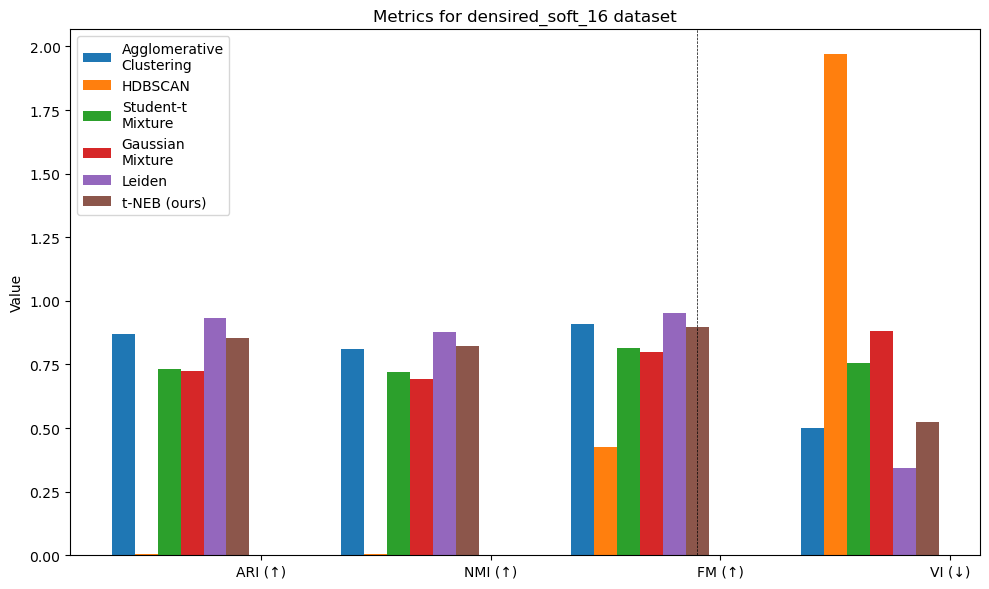

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the metrics for the 'densired_soft_16' dataset
metrics_densired_soft_16 = metrics['densired_soft_16']

# Extract the metric values
metric_values = list(metrics_densired_soft_16.values())

# Extract the algorithm names
algorithm_names = list(metrics_densired_soft_16.keys())
for i in range(len(algorithm_names)):
    if algorithm_names[i] in corc.our_algorithms.ALG_DISPLAYNAMES.keys():
        algorithm_names[i] = corc.our_algorithms.ALG_DISPLAYNAMES[algorithm_names[i]]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis ticks
x = np.arange(len(metric_values[0]))  # number of metrics
width = 0.1  # width of each bar
x_pos = np.arange(len(metric_values[0]))  # positions of the bars

# Plot the bars
for i, algorithm in enumerate(algorithms):
    metric = [metrics_densired_soft_16[algorithm][j] for j in range(len(metric_values[0]))]
    alg_name = corc.our_algorithms.ALG_DISPLAYNAMES[algorithm] if algorithm in corc.our_algorithms.ALG_DISPLAYNAMES.keys() else algorithm
    ax.bar(x_pos + i * width, metric, width, label= alg_name)

# Set the x-axis ticks and labels
ax.set_xticks(x_pos + (len(algorithm_names) - 1) * width / 2)
ax.set_xticklabels(['ARI (↑)', 'NMI (↑)', 'FM (↑)', 'VI (↓)'])

# Set the y-axis label
ax.set_ylabel('Value')

# Set the title
ax.set_title('Metrics for densired_soft_16 dataset')

# Add a legend
ax.legend()
# ax.legend(title='Algorithms')

ax.axvline(x=3.1 - (len(algorithm_names) - 1) * width / 2, color='black', linestyle='--', linewidth=0.5)
# Show the plot
plt.tight_layout()
plt.show()

In [74]:
# Color the top three values per column
def color_top3(val, series):
    if val in series.nlargest(3).values:
        if val == series.max():
            return 'background-color: lightgreen'
        elif val == series.nlargest(2).iloc[1]:
            return 'background-color: yellow'
        # elif val == series.nlargest(3).iloc[2]:
        #     return 'background-color: orange'
    else:
        return ''
    
# Color the top three values per column
def color_min3(val, series):
    if val in series.nsmallest(3).values:
        if val == series.nsmallest(1).iloc[0]:
            return 'background-color: lightgreen'
        elif val == series.nsmallest(2).iloc[1]:
            return 'background-color: yellow'
        # elif val == series.nsmallest(3).iloc[2]:
        #     return 'background-color: orange'
    else:
        return ''

In [162]:
ari_table.style.apply(lambda x: x.apply(lambda y: color_top3(y, x))).format("{:.2f}")


,Densired 'circles' 8D,Densired 'circles' 16D,Densired 'circles' 32D,Densired 'circles' 64D,Densired 'Stud-t' 8D,Densired 'Stud-t' 16D,Densired 'Stud-t' 32D,Densired 'Stud-t' 64D,MNIST-Nd 8D,MNIST-Nd 16D,MNIST-Nd 32D,MNIST-Nd 64D
Agglomerative Clustering,0.68,0.66,0.59,0.75,0.56,0.87,0.90,0.64,0.80,0.68,0.62,0.49
HDBSCAN,0.00,0.00,0.44,0.00,0.01,0.00,0.00,0.00,0.03,0.06,0.07,0.07
Gaussian Mixture,0.89,0.77,0.75,0.83,0.76,0.72,0.49,0.55,0.89,0.85,0.74,0.63
Student-t Mixture,0.81,0.77,0.63,0.60,0.77,0.73,0.90,0.83,0.89,0.90,0.90,0.76
Leiden,0.83,0.77,0.76,0.85,0.89,0.93,0.91,0.82,0.89,0.92,0.93,0.70
t-NEB (ours),0.99,1.00,0.94,0.96,0.88,0.86,0.93,0.83,0.77,0.84,0.80,0.65


In [165]:
nmi_table.style.apply(lambda x: x.apply(lambda y: color_top3(y, x))).format("{:.2f}")


,Densired 'circles' 8D,Densired 'circles' 16D,Densired 'circles' 32D,Densired 'circles' 64D,Densired 'Stud-t' 8D,Densired 'Stud-t' 16D,Densired 'Stud-t' 32D,Densired 'Stud-t' 64D,MNIST-Nd 8D,MNIST-Nd 16D,MNIST-Nd 32D,MNIST-Nd 64D
Agglomerative Clustering,0.82,0.82,0.79,0.84,0.59,0.81,0.85,0.71,0.83,0.78,0.75,0.65
HDBSCAN,0.00,0.00,0.59,0.00,0.00,0.00,0.01,0.01,0.06,0.11,0.14,0.13
Gaussian Mixture,0.93,0.90,0.83,0.85,0.72,0.69,0.56,0.61,0.89,0.87,0.79,0.72
Student-t Mixture,0.91,0.90,0.81,0.78,0.71,0.72,0.84,0.75,0.89,0.89,0.89,0.83
Leiden,0.91,0.90,0.90,0.92,0.82,0.88,0.86,0.83,0.89,0.91,0.91,0.79
t-NEB (ours),0.97,1.00,0.95,0.96,0.82,0.82,0.87,0.80,0.85,0.89,0.87,0.75


In [166]:
fm_table.style.apply(lambda x: x.apply(lambda y: color_top3(y, x))).format("{:.2f}")

,Densired 'circles' 8D,Densired 'circles' 16D,Densired 'circles' 32D,Densired 'circles' 64D,Densired 'Stud-t' 8D,Densired 'Stud-t' 16D,Densired 'Stud-t' 32D,Densired 'Stud-t' 64D,MNIST-Nd 8D,MNIST-Nd 16D,MNIST-Nd 32D,MNIST-Nd 64D
Agglomerative Clustering,0.77,0.76,0.70,0.82,0.73,0.91,0.93,0.79,0.82,0.72,0.66,0.55
HDBSCAN,0.54,0.54,0.70,0.54,0.44,0.43,0.42,0.39,0.26,0.29,0.30,0.30
Gaussian Mixture,0.92,0.84,0.82,0.88,0.83,0.80,0.64,0.74,0.90,0.86,0.76,0.67
Student-t Mixture,0.86,0.83,0.74,0.71,0.83,0.81,0.93,0.88,0.90,0.91,0.91,0.79
Leiden,0.88,0.84,0.83,0.90,0.92,0.95,0.94,0.88,0.90,0.93,0.93,0.75
t-NEB (ours),0.99,1.00,0.96,0.97,0.92,0.90,0.95,0.88,0.80,0.86,0.83,0.69


In [167]:
vi_table.style.apply(lambda x: x.apply(lambda y: color_min3(y, x))).format("{:.2f}")

,Densired 'circles' 8D,Densired 'circles' 16D,Densired 'circles' 32D,Densired 'circles' 64D,Densired 'Stud-t' 8D,Densired 'Stud-t' 16D,Densired 'Stud-t' 32D,Densired 'Stud-t' 64D,MNIST-Nd 8D,MNIST-Nd 16D,MNIST-Nd 32D,MNIST-Nd 64D
Agglomerative Clustering,0.55,0.56,0.66,0.49,0.95,0.50,0.41,0.65,0.78,1.00,1.12,1.57
HDBSCAN,1.41,1.42,0.82,1.41,1.94,1.97,1.97,2.07,2.80,2.65,2.59,2.60
Gaussian Mixture,0.22,0.31,0.51,0.44,0.83,0.88,1.16,0.82,0.52,0.61,0.95,1.29
Student-t Mixture,0.28,0.31,0.59,0.69,0.82,0.76,0.42,0.69,0.52,0.49,0.49,0.74
Leiden,0.27,0.31,0.32,0.23,0.49,0.34,0.37,0.45,0.52,0.41,0.40,0.91
t-NEB (ours),0.09,0.01,0.15,0.11,0.50,0.52,0.36,0.61,0.67,0.52,0.59,1.14


In [168]:
big_df = pd.concat([ari_table.assign(metric='ARI (↑)'), 
                    nmi_table.assign(metric='NMI (↑)'), 
                    fm_table.assign(metric='FM (↑)'), 
                    vi_table.assign(metric='VI (↓)')], axis=0)

In [169]:
big_df

,Densired\n'circles' 8D,Densired\n'circles' 16D,Densired\n'circles' 32D,Densired\n'circles' 64D,Densired\n'Stud-t' 8D,Densired\n'Stud-t' 16D,Densired\n'Stud-t' 32D,Densired\n'Stud-t' 64D,MNIST-Nd\n8D,MNIST-Nd\n16D,MNIST-Nd\n32D,MNIST-Nd\n64D,metric
Agglomerative\nClustering,0.68,0.66,0.59,0.75,0.56,0.87,0.90,0.64,0.80,0.68,0.62,0.49,ARI (↑)
HDBSCAN,0.00,0.00,0.44,0.00,0.01,0.00,0.00,0.00,0.03,0.06,0.07,0.07,ARI (↑)
Gaussian\nMixture,0.89,0.77,0.75,0.83,0.76,0.72,0.49,0.55,0.89,0.85,0.74,0.63,ARI (↑)
Student-t\nMixture,0.81,0.77,0.63,0.60,0.77,0.73,0.90,0.83,0.89,0.90,0.90,0.76,ARI (↑)
Leiden,0.83,0.77,0.76,0.85,0.89,0.93,0.91,0.82,0.89,0.92,0.93,0.70,ARI (↑)
t-NEB (ours),0.99,1.00,0.94,0.96,0.88,0.86,0.93,0.83,0.77,0.84,0.80,0.65,ARI (↑)
Agglomerative\nClustering,0.82,0.82,0.79,0.84,0.59,0.81,0.85,0.71,0.83,0.78,0.75,0.65,NMI (↑)
HDBSCAN,0.00,0.00,0.59,0.00,0.00,0.00,0.01,0.01,0.06,0.11,0.14,0.13,NMI (↑)
Gaussian\nMixture,0.93,0.90,0.83,0.85,0.72,0.69,0.56,0.61,0.89,0.87,0.79,0.72,NMI (↑)
Student-t\nMixture,0.91,0.90,0.81,0.78,0.71,0.72,0.84,0.75,0.89,0.89,0.89,0.83,NMI (↑)
